In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import numpy as np

In [93]:
def visualize_stock_price(df, time_col, price_col):
    """
    Vẽ biểu đồ giá chứng khoán theo thời gian.

    Tham số:
    - df: pandas.DataFrame chứa dữ liệu
    - time_col: tên cột thời gian (datetime hoặc convertible sang datetime)
    - price_col: tên cột giá

    Ví dụ:
      visualize_stock_price(df, 'Datetime', 'Close')
    """
    # Chuẩn hóa dữ liệu
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col, price_col])

    # Vẽ
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df[time_col], df[price_col], marker='o', linestyle='-', color='tab:blue')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    ax.set_title(f"{price_col} over {time_col}")
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

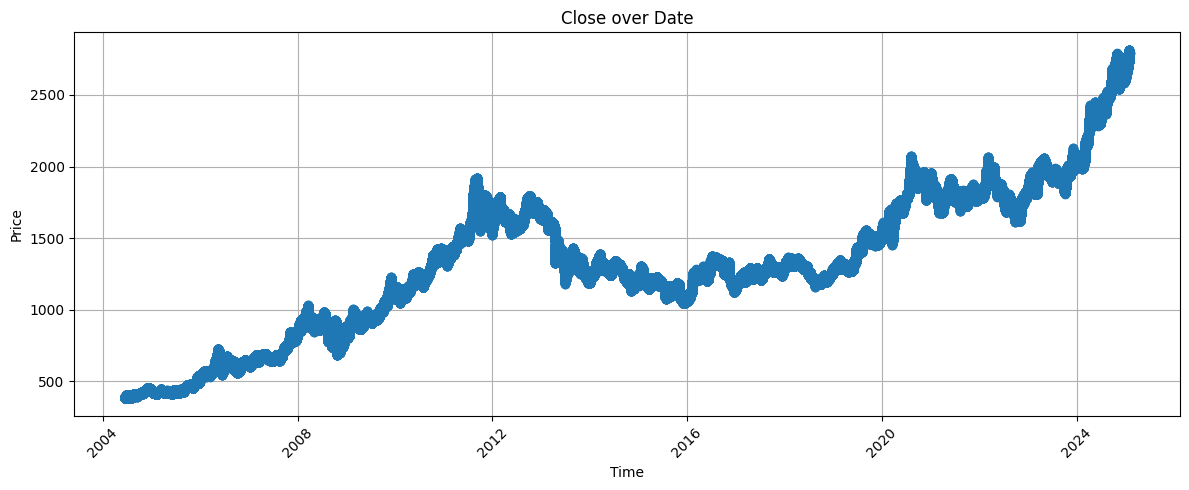

In [94]:
df = pd.read_csv('XAU_5m_data.csv', sep=';')
visualize_stock_price(df, 'Date', 'Close')

In [ ]:
def plot_labeled_price_by_time(df, start_time, end_time):
    """
    Vẽ giá và đánh dấu từng điểm bằng chấm màu theo Label.
    """
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')
    df.dropna(subset=['Datetime'], inplace=True)
    start_dt = pd.to_datetime(start_time)
    end_dt = pd.to_datetime(end_time)
    df_sample = df[(df['Datetime'] >= start_dt) & (df['Datetime'] <= end_dt)]
    if len(df_sample) < 2:
        print("Không đủ dữ liệu để vẽ."); return

    # map màu
    color_map = {'BUY':'blue','SELL':'red','HOLD':'yellow'}
    colors = df_sample['Label'].map(color_map).fillna('black').tolist()

    # vẽ line nhạt
    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(df_sample['Datetime'], df_sample['Close'],
            color='lightgray', linewidth=1)

    # vẽ điểm scatter
    ax.scatter(df_sample['Datetime'], df_sample['Close'],
               c=colors, s=30, edgecolor='k', zorder=3)

    # định dạng trục
    ax.set_xlim(df_sample['Datetime'].iloc[0], df_sample['Datetime'].iloc[-1])
    ax.set_ylim(df_sample['Close'].min(), df_sample['Close'].max())
    ax.set_title(f"Giá vàng từ {start_dt} đến {end_dt}")
    ax.set_xlabel("Thời gian"); ax.set_ylabel("Giá Close")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    fig.autofmt_xdate(); plt.grid(True)

    # legend
    legend_elements = [
        Line2D([0],[0], marker='o', color='w', markerfacecolor='blue',  label='BUY',  markersize=8),
        Line2D([0],[0], marker='o', color='w', markerfacecolor='red',   label='SELL', markersize=8),
        Line2D([0],[0], marker='o', color='w', markerfacecolor='yellow',label='HOLD', markersize=8),
    ]
    ax.legend(handles=legend_elements, title="Label")
    plt.show()

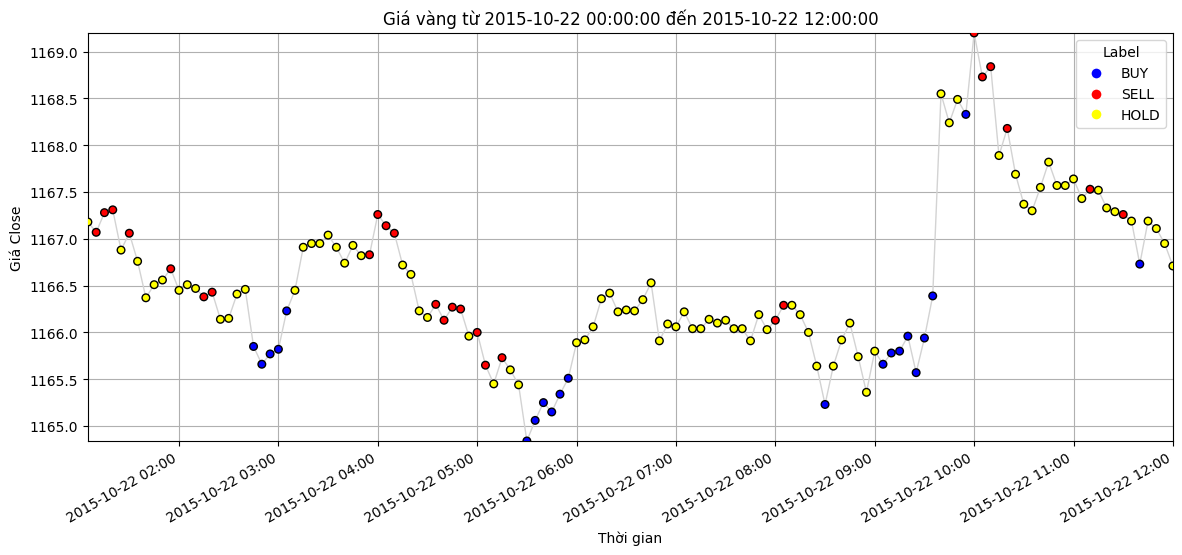

In [96]:
df = pd.read_csv('dynamic_labeled_train.csv')
plot_labeled_price_by_time(
    df,
    start_time='2015-10-22 00:00:00',
    end_time='2015-10-22 12:00:00'
)

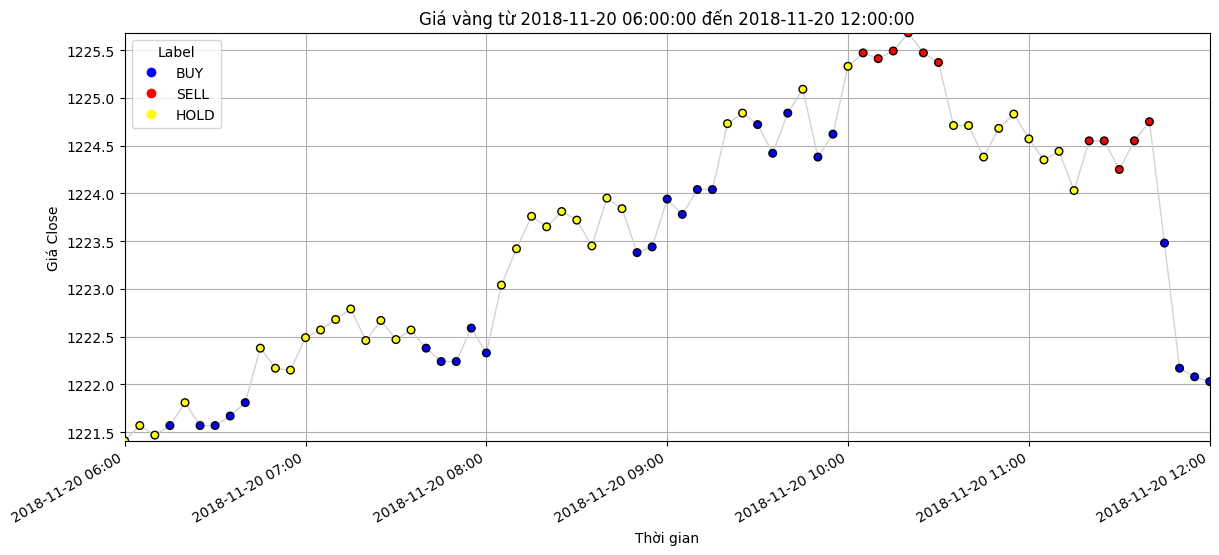

In [97]:
plot_labeled_price_by_time(
    df,
    start_time='2018-11-20 06:00:00',
    end_time='2018-11-20 12:00:00'
)

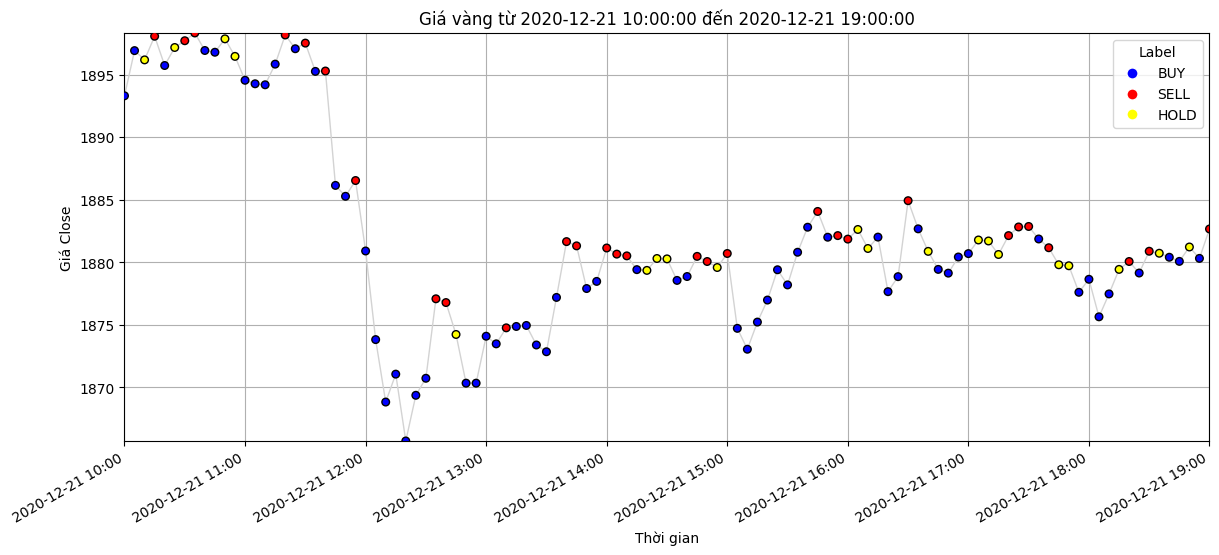

In [98]:
plot_labeled_price_by_time(
    df,
    start_time='2020-12-21 10:00:00',
    end_time='2020-12-21 19:00:00'
)

In [ ]:
def count_gap_points(df, time_col, delta, k):
    """
    Đếm số điểm mà:
      delta < (t_i - t_{i-1}) < delta*k

    Tham số:
      - df: DataFrame có cột thời gian time_col
      - time_col: tên cột datetime hoặc convertible sang datetime
      - delta: khoảng thời gian cơ sở (ví dụ '5min', '00:01:00', Timedelta…)
      - k: hệ số nguyên

    Trả về:
      - số điểm thỏa điều kiện
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.sort_values(time_col).dropna(subset=[time_col])

    prev_diff = df[time_col].diff()
    delta_td = pd.to_timedelta(delta)

    mask = (
        (prev_diff > delta_td) & (prev_diff < delta_td * k)
    )
    return int(mask.sum())

In [100]:
train_df = pd.read_csv('dynamic_labeled_train.csv')
dev_df = pd.read_csv('dynamic_labeled_dev.csv')
test_df = pd.read_csv('dynamic_labeled_test.csv')

delta = '5min'
k = 10
print('----------------------\nTrain set:')
print(count_gap_points(train_df, 'Date', delta, k))
print('----------------------\nDev set:')
print(count_gap_points(dev_df, 'Date', delta, k))
print('----------------------\nTest set:')
print(count_gap_points(test_df, 'Date', delta, k))


----------------------
Train set:
317
----------------------
Dev set:
4
----------------------
Test set:
12
